<a href="https://colab.research.google.com/github/DaryaJavadi/data_science/blob/main/projects/boston_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/the-boston-houseprice-data")

print("Path to dataset files:", path)

100%|██████████| 12.3k/12.3k [00:00<00:00, 17.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/the-boston-houseprice-data/versions/1


In [ ]:
df = pd.read_csv(path + "/boston.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
X = df.drop(["MEDV"], axis=1)
y = df["MEDV"].copy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly.fit_transform(X)

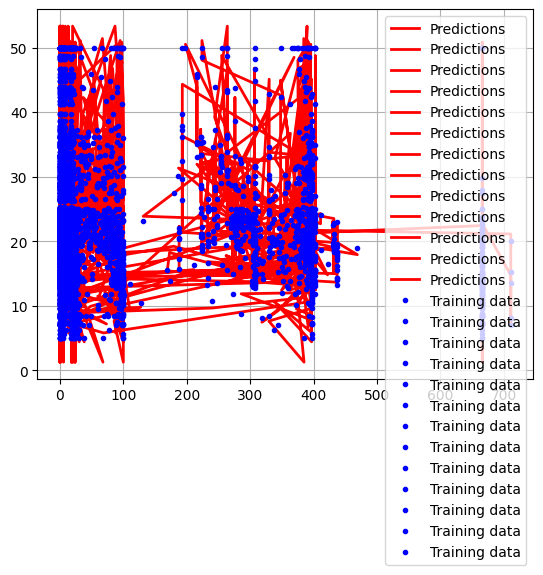

In [ ]:
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

X_new_poly = poly.transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_predicts = lin_reg.predict(X_new_poly)
plt.plot(X, y_predicts, "r-", linewidth = 2, label = "Predictions")
plt.plot(X, y, "b.", label = 'Training data')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

poly_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly_features", PolynomialFeatures(degree=2)),
    ("model", LinearRegression())
])
from sklearn.preprocessing import PolynomialFeatures

poly_pipeline.fit(X_train, y_train)

y_train_pred_poly = poly_pipeline.predict(X_train)
y_test_pred_poly = poly_pipeline.predict(X_test)

print("Polynomial (Degree 2)")
print("Train MSE:", mean_squared_error(y_train, y_train_pred_poly))
print("Test MSE:", mean_squared_error(y_test, y_test_pred_poly))
print("Test R2 Score:", r2_score(y_test, y_test_pred_poly))

Polynomial (Degree 2)
Train MSE: 5.131464044082097
Test MSE: 14.257338168909422
Test R2 Score: 0.805582944797217


In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_interaction = poly.fit_transform(X_train)
X_test_interaction = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_interaction, y_train)

y_train_pred = model.predict(X_train_interaction)
y_test_pred = model.predict(X_test_interaction)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("R² Score (Train):", train_r2)
print("R² Score (Test):", test_r2)

R² Score (Train): 0.9303305227897214
R² Score (Test): 0.8440550065320646


In [ ]:
from sklearn.linear_model import Ridge

overfit_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("scaler", StandardScaler()),
    ("ridge_reg", Ridge(alpha=1.0))
])


overfit_pipeline.fit(X_train, y_train)

y_train_pred_overfit = overfit_pipeline.predict(X_train)
y_test_pred_overfit = overfit_pipeline.predict(X_test)

print("Overfitting (Degree 10)")
print("Train MSE:", mean_squared_error(y_train, y_train_pred_overfit))
print("Test MSE:", mean_squared_error(y_test, y_test_pred_overfit))
print("Test R2 Score:", r2_score(y_test, y_test_pred_overfit))

Overfitting (Degree 10)
Train MSE: 0.04784689846573871
Test MSE: 31634.393333716063
Test R2 Score: -430.37544485543145


In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state = 42, penalty = 'l2')

sgd_reg.fit(X, y.ravel())

<ipython-input-14-eda314d4dd3f>:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  sgd_reg.fit(X, y.ravel())


SGDRegressor(random_state=42)

In [ ]:
linear_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

linear_pipeline.fit(X_train, y_train)

y_train_pred_lin = linear_pipeline.predict(X_train)
y_test_pred_lin = linear_pipeline.predict(X_test)

print("Linear Regression")
print("Train MSE:", mean_squared_error(y_train, y_train_pred_lin))
print("Test MSE:", mean_squared_error(y_test, y_test_pred_lin))
print("Test R2 Score:", r2_score(y_test, y_test_pred_lin))

Linear Regression
Train MSE: 21.641412753226316
Test MSE: 24.29111947497351
Test R2 Score: 0.6687594935356321


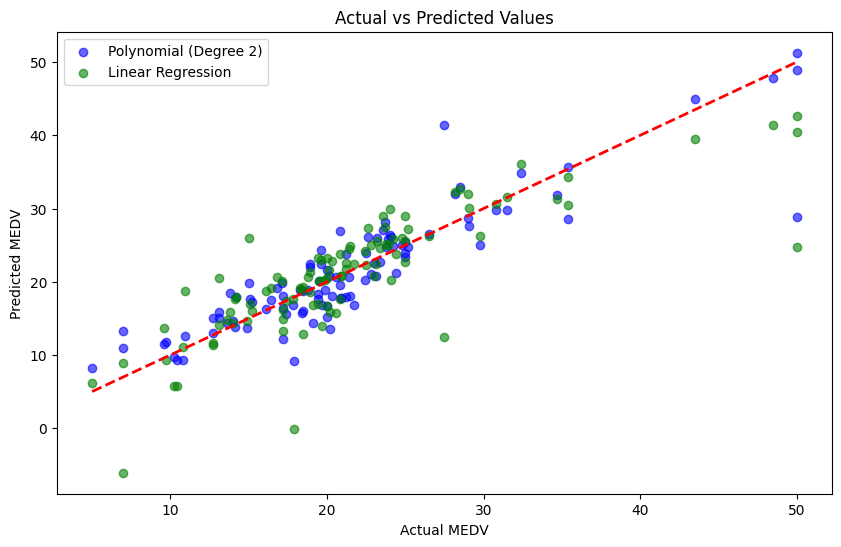

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_poly, color="blue", label="Polynomial (Degree 2)", alpha=0.6)
plt.scatter(y_test, y_test_pred_lin, color="green", label="Linear Regression", alpha=0.6)
# plt.scatter(y_test, y_test_pred_overfit, color="orange", label="Polynomial (Degree 10)", alpha=0.6)

plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", lw=2, linestyle="--")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

param_grid = {'poly_features__degree': range(1, 6)}
grid_search = GridSearchCV(poly_pipeline, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

print("Best Polynomial Degree:", grid_search.best_params_)

Best Polynomial Degree: {'poly_features__degree': 2}


In [ ]:
from sklearn.linear_model import Ridge

overfit_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("scaler", StandardScaler()),
    ("ridge_reg", Ridge(alpha=1.0))
])


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_interaction = poly.fit_transform(X_train)
X_test_interaction = poly.transform(X_test)